In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
path=r'C:\Users\Админ\Desktop\online_retail.csv'
df=pd.read_csv(path)

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
#1 data description

In [5]:
df.shape


(541909, 8)

In [6]:
print(f"Number of unique transactions: {df['InvoiceNo'].nunique()}")

Number of unique transactions: 25900


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
#2 data preprocessing and transformation

<Axes: >

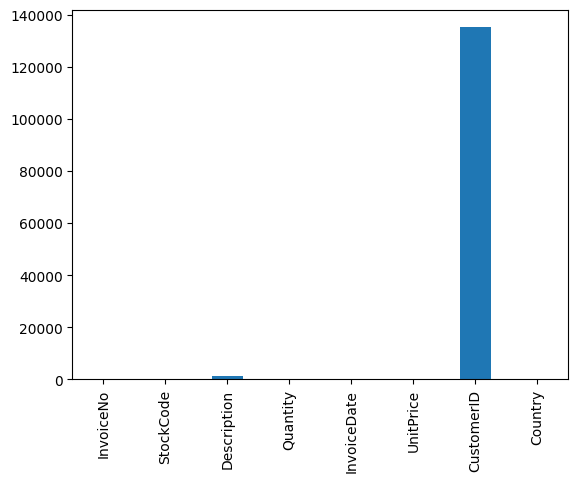

In [9]:
#Checking for Missing Values

df.isna().sum().plot.bar()

In [10]:
df.dropna(subset=['CustomerID'], inplace=True)

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:

df_clean = df[df['Quantity'] > 0].copy()


df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [13]:
df_clean.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [14]:
# 3 eda and visualisation

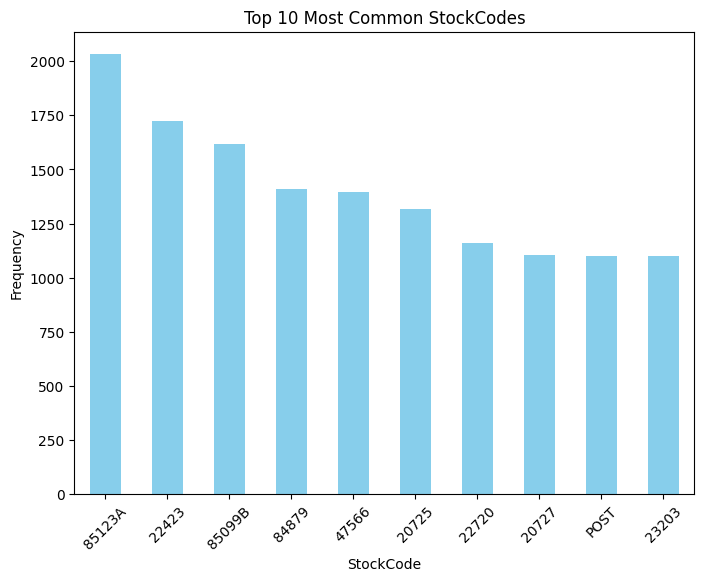

In [15]:
# Top 10 StockCodes
top_stockcodes = df_clean['StockCode'].value_counts().head(10)

top_stockcodes.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title("Top 10 Most Common StockCodes")
plt.xlabel("StockCode")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


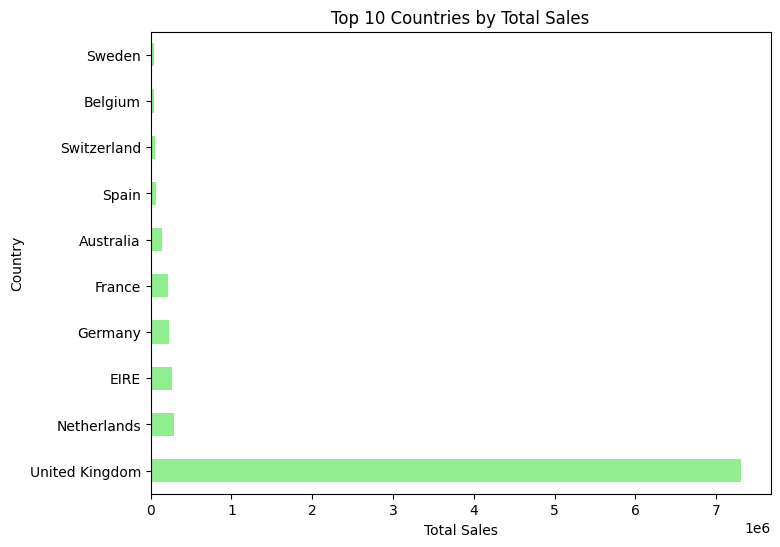

In [16]:
# Group by Country
sales_by_country = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

sales_by_country.plot(kind='barh', color='lightgreen', figsize=(8, 6))
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.show()


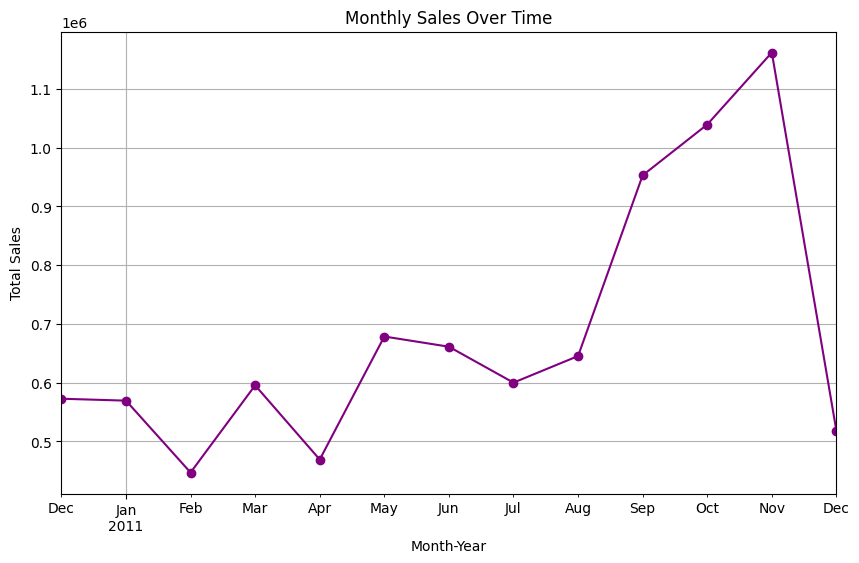

In [17]:
# Convert InvoiceDate to datetime if not already done
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

df_clean['MonthYear'] = df_clean['InvoiceDate'].dt.to_period('M')

monthly_sales = df_clean.groupby('MonthYear')['TotalPrice'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(10, 6), color='purple')
plt.title("Monthly Sales Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


TotalPrice    1.000000
Quantity      0.908812
UnitPrice     0.081646
CustomerID   -0.004104
Name: TotalPrice, dtype: float64


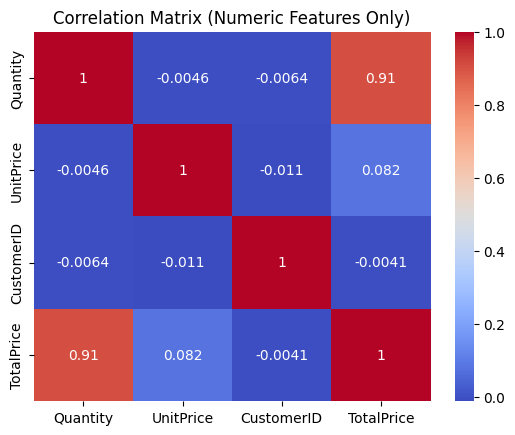

In [18]:
# Select only numeric columns
numeric_cols = df_clean.select_dtypes(include=['number'])


correlation_matrix = numeric_cols.corr()


print(correlation_matrix['TotalPrice'].sort_values(ascending=False))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


In [19]:
#4 feature selection and dimensionality reduction

In [20]:
X = df_clean[['Quantity', 'UnitPrice', 'CustomerID']]  # Select numeric features
y = df_clean['TotalPrice']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=2)
fit = rfe.fit(X, y)

print("Selected Features:", X.columns[fit.support_])


Selected Features: Index(['Quantity', 'UnitPrice'], dtype='object')


Explained Variance Ratio: [0.33702281 0.33461593]


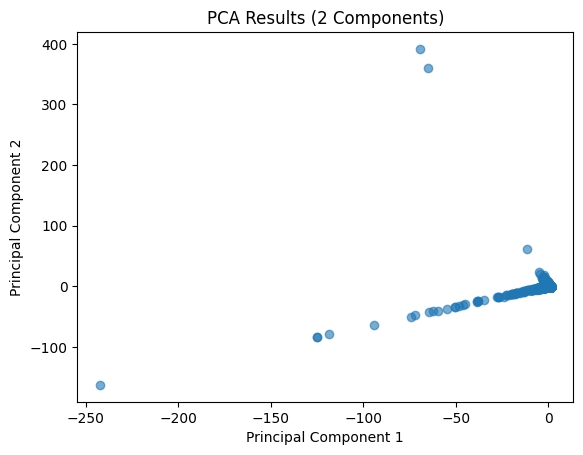

In [21]:
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
plt.title("PCA Results (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [22]:
#5 classification tech

In [23]:
df_clean['cancellation'] = (df_clean['TotalPrice'] > 100).astype(int)

In [24]:
df_clean.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'MonthYear',
       'cancellation'],
      dtype='object')

In [25]:
selected_features = ['Quantity', 'UnitPrice']
X = df_clean[selected_features]
y = df_clean['cancellation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

y_pred_dtree = dtree.predict(X_test)

print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))


Decision Tree Performance:
Accuracy: 0.999937174090595
Confusion Matrix:
 [[77195     2]
 [    3  2385]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     77197
           1       1.00      1.00      1.00      2388

    accuracy                           1.00     79585
   macro avg       1.00      1.00      1.00     79585
weighted avg       1.00      1.00      1.00     79585



In [27]:
#6 adv classification methods

In [28]:
threshold = df_clean['TotalPrice'].median()
df_clean['HighSpender'] = (df_clean['TotalPrice'] > threshold).astype(int)


selected_features = ['Quantity', 'UnitPrice']

X = df_clean[selected_features]
y = df_clean['HighSpender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.999987434818119
Confusion Matrix:
 [[39898     0]
 [    1 39686]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39898
           1       1.00      1.00      1.00     39687

    accuracy                           1.00     79585
   macro avg       1.00      1.00      1.00     79585
weighted avg       1.00      1.00      1.00     79585



In [30]:
#7 clustering methods/segmenting customer data

In [31]:
reference_date = df_clean["InvoiceDate"].max()
df_clean['Recency'] = (reference_date - df_clean.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days

df_frequency = df_clean.groupby('CustomerID').InvoiceNo.nunique().reset_index()
df_frequency.columns = ['CustomerID', 'Frequency']

df_monetary = df_clean.groupby('CustomerID')['TotalPrice'].sum().reset_index()
df_monetary.columns = ['CustomerID', 'Monetary']

df_rfm = df_clean.groupby('CustomerID').agg({
    'Recency': 'min',         
    'InvoiceNo': 'nunique', 
    'TotalPrice': 'sum'      
}).reset_index()


In [32]:
# Rename columns for clarity
df_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [33]:
scaler = StandardScaler()

df_rfm_scaled = scaler.fit_transform(df_rfm[['Recency', 'Frequency', 'Monetary']])

In [34]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  


In [35]:
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_rfm_scaled)
    inertia.append(kmeans.inertia_)

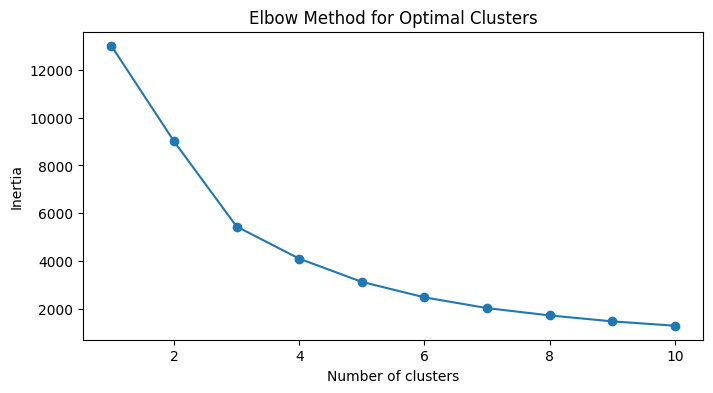

In [36]:

plt.figure(figsize=(8,4))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_rfm['Cluster'] = kmeans.fit_predict(df_rfm_scaled)

df_rfm['Cluster'].value_counts()

Cluster
3    3053
1    1062
0     211
2      13
Name: count, dtype: int64

In [38]:
cluster_summary = df_rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)

cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,14.67,22.05,12453.23
1,247.56,1.55,478.11
2,6.38,82.69,127338.31
3,42.91,3.66,1349.70


In [39]:
#8 advanced clustering tech

In [40]:

X = df_clean[['Quantity', 'UnitPrice', 'CustomerID']] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
X_scaled

array([[-0.03891932, -0.02562251,  1.49178904],
       [-0.03891932,  0.01239211,  1.49178904],
       [-0.02783407, -0.01657141,  1.49178904],
       ...,
       [-0.05000457,  0.04678629, -1.52601239],
       [-0.05000457,  0.04678629, -1.52601239],
       [-0.05554719,  0.0829907 , -1.52601239]])

In [42]:

dbscan_model = DBSCAN(eps=0.5, min_samples=5) 
dbscan_labels = dbscan_model.fit_predict(X_scaled)

df_clean['DBSCAN_Cluster'] = dbscan_labels

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', marker='o', s=50, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.colorbar(label='Cluster')
plt.show()

print("Number of DBSCAN clusters (excluding noise):", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))


In [43]:

gmm_model = GaussianMixture(n_components=3, random_state=42) 
gmm_labels = gmm_model.fit_predict(X_scaled)

df_clean['GMM_Cluster'] = gmm_labels


plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=gmm_labels, palette='viridis', s=100, alpha=0.7)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend(title='Cluster')
plt.show()

print("Number of GMM clusters:", len(set(gmm_labels)))


In [44]:
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,MonthYear,cancellation,HighSpender,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,0,1,371
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,0,1,371
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,0,1,371
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,0,1,371
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,0,1,371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12,0,0,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12,0,1,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,0,1,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,0,1,0


In [46]:
#13 anomaly detection

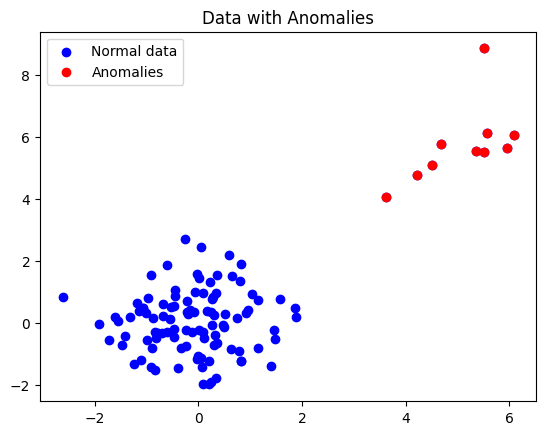

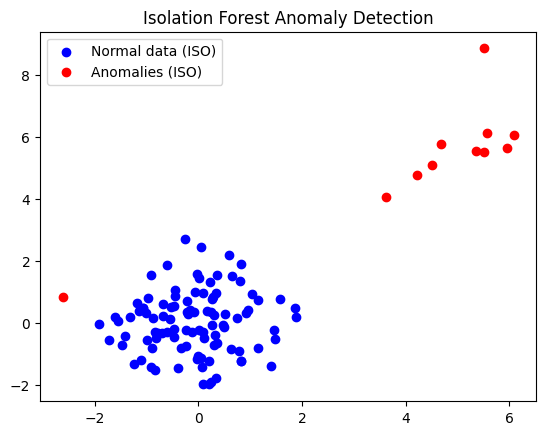

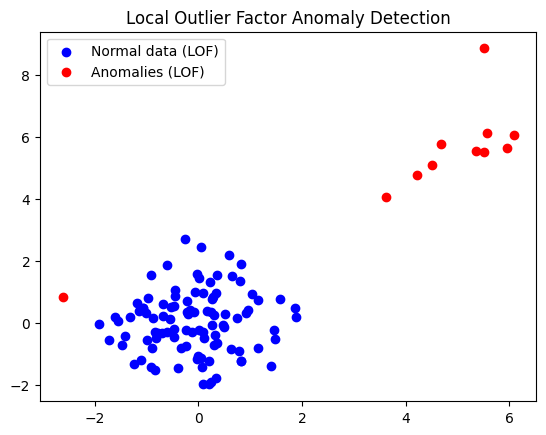

In [54]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
np.random.seed(42)

X_normal = np.random.normal(loc=0, scale=1, size=(100, 2))

X_anomaly = np.random.normal(loc=5, scale=1, size=(10, 2))

X = np.vstack([X_normal, X_anomaly])

plt.scatter(X[:, 0], X[:, 1], color='blue', label='Normal data')
plt.scatter(X_anomaly[:, 0], X_anomaly[:, 1], color='red', label='Anomalies')
plt.title("Data with Anomalies")
plt.legend()
plt.show()

# -------------------------------------
# 1. Isolation Forest for Anomaly Detection
# -------------------------------------
# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1)  
iso_forest.fit(X)

y_pred_iso = iso_forest.predict(X)

X_iso_normal = X[y_pred_iso == 1]
X_iso_anomaly = X[y_pred_iso == -1]

plt.scatter(X_iso_normal[:, 0], X_iso_normal[:, 1], color='blue', label='Normal data (ISO)')
plt.scatter(X_iso_anomaly[:, 0], X_iso_anomaly[:, 1], color='red', label='Anomalies (ISO)')
plt.title("Isolation Forest Anomaly Detection")
plt.legend()
plt.show()

# -------------------------------------
# 2. Local Outlier Factor (LOF)
# -------------------------------------
# Fit the LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_lof = lof.fit_predict(X)

X_lof_normal = X[y_pred_lof == 1]
X_lof_anomaly = X[y_pred_lof == -1]


plt.scatter(X_lof_normal[:, 0], X_lof_normal[:, 1], color='blue', label='Normal data (LOF)')
plt.scatter(X_lof_anomaly[:, 0], X_lof_anomaly[:, 1], color='red', label='Anomalies (LOF)')
plt.title("Local Outlier Factor Anomaly Detection")
plt.legend()
plt.show()


In [47]:
#14 time series analysis

In [56]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.8 MB 4.2 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.8 MB 4.2 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.8 MB 6.3 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.8 MB 6.8 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 6.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
df_clean.head(3)



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,MonthYear,cancellation,HighSpender,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,0,1,371
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,0,1,371
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,0,1,371


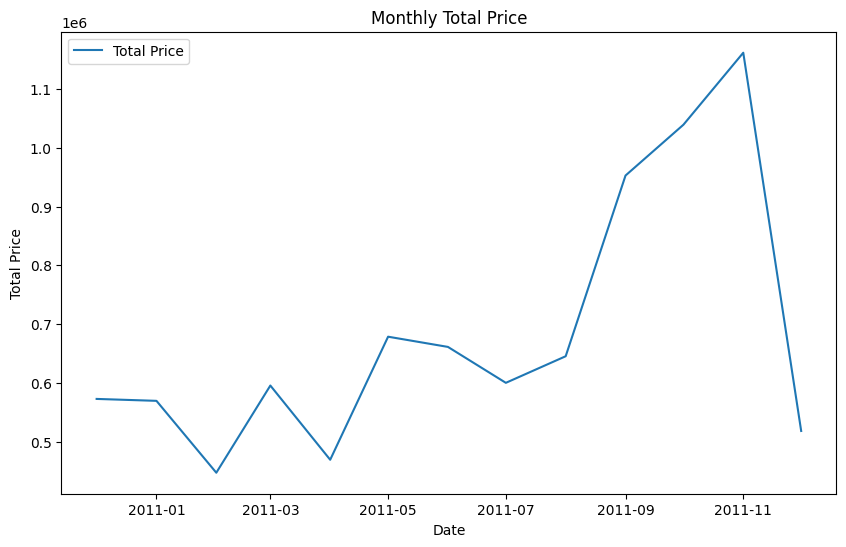

ADF Statistic: -1.8955716546688306
p-value: 0.3341472033632615
Data is non-stationary
ADF Statistic: -2.439283174444515
p-value: 0.1309545125209191
Data is non-stationary


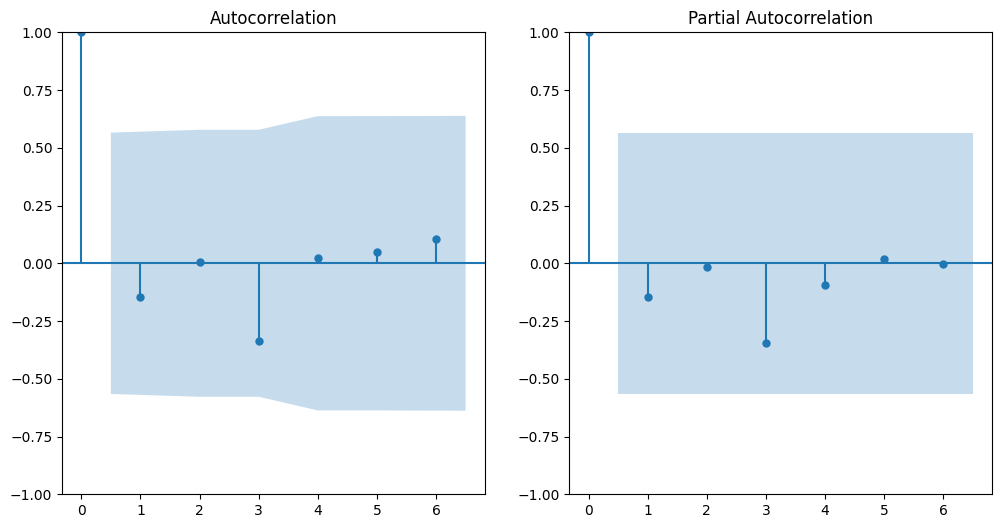

C:\Users\Админ\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Админ\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Админ\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Админ\AppData\Local\Temp\ipykernel_12720\3013087313.py:80: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df_monthly.index[-1], periods=forecast_steps + 1, freq='M')[1:], forecast, label='Forecasted Data', 

                               SARIMAX Results                                
Dep. Variable:             TotalPrice   No. Observations:                   13
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -165.067
Date:                Fri, 13 Dec 2024   AIC                            336.135
Time:                        23:38:30   BIC                            337.590
Sample:                    12-01-2010   HQIC                           335.596
                         - 12-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3562      2.061      0.173      0.863      -3.683       4.395
ma.L1         -0.6282      1.420     -0.442      0.658      -3.411       2.155
sigma2      6.995e+10   1.67e-11   4.18e+21      0.0

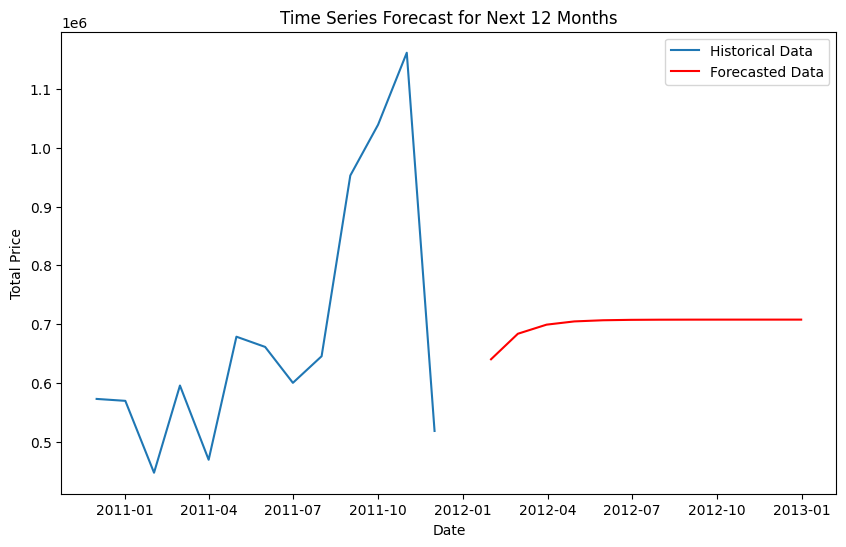

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

df_monthly = df_clean.groupby('MonthYear').agg({'TotalPrice': 'sum'}).reset_index()

df_monthly['MonthYear'] = pd.to_datetime(df_monthly['MonthYear'].astype(str), format='%Y-%m')

df_monthly.set_index('MonthYear', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df_monthly['TotalPrice'], label='Total Price')
plt.title('Monthly Total Price')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.legend()
plt.show()

def test_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")


test_stationarity(df_monthly['TotalPrice'])


df_diff = df_monthly['TotalPrice'].diff().dropna()

test_stationarity(df_diff)

plt.figure(figsize=(12, 6))


max_lags = int(len(df_diff) / 2)


plt.subplot(121)
plot_acf(df_diff, lags=max_lags, ax=plt.gca())


plt.subplot(122)
plot_pacf(df_diff, lags=max_lags, ax=plt.gca())

plt.show()


model = ARIMA(df_monthly['TotalPrice'], order=(1, 1, 1)) 
model_fit = model.fit()


print(model_fit.summary())


forecast_steps = 12  
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(df_monthly['TotalPrice'], label='Historical Data')
plt.plot(pd.date_range(df_monthly.index[-1], periods=forecast_steps + 1, freq='M')[1:], forecast, label='Forecasted Data', color='red')
plt.title(f'Time Series Forecast for Next {forecast_steps} Months')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.legend()
plt.show()


In [48]:
#text mining and nlp

In [65]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ---------------------------------- ----- 1.3/1.5 MB 4.9 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 4.9 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
!pip install textblob 

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 626.3/626.3 kB 2.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Админ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from textblob import TextBlob
import string


df_clean['Description'] = df_clean['Description'].fillna('')


df_clean['tokens'] = df_clean['Description'].apply(lambda x: word_tokenize(x.lower()))

stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

df_clean['clean_tokens'] = df_clean['tokens'].apply(lambda x: [word for word in x if word not in stop_words and word not in punctuations])


ps = PorterStemmer()

df_clean['stemmed_tokens'] = df_clean['clean_tokens'].apply(lambda x: [ps.stem(word) for word in x])


all_words = [word for tokens in df_clean['clean_tokens'] for word in tokens]
fdist = FreqDist(all_words)

plt.figure(figsize=(12, 6))
fdist.plot(20, cumulative=False)
plt.show()


df_clean['sentiment'] = df_clean['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)


df_clean['sentiment_label'] = df_clean['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


sentiment_counts = df_clean['sentiment_label'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Analysis of Customer Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("Sample Cleaned Data with Tokens and Sentiments:")
print(df_clean[['Description', 'clean_tokens', 'stemmed_tokens', 'sentiment_label']].head())
